In [1]:
%matplotlib inline
import os
import pandas as pd
from glob import glob
import numpy as np

In [2]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%%capture
!apt-get install libav-tools -y

In [4]:
import librosa
import librosa.display
import pylab

In [8]:
import gc
!pip install path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from path import Path
from sklearn.metrics import mean_squared_error
from matplotlib import figure
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

In [10]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2023-05-07 04:51:28--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2023-05-07 04:51:28--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f885aeab96fb007337079e731.dl.dropboxusercontent.com/cd/0/inline/B7kvbRq6DjvDbXfYrMJvXnu7IqV_ZwDUc7P2E37oPqR8u4YegpaHrucqVZbogX8jts7JAgXNMEqtxkRIBdNUsGK8huhSX3cMUPn55UJ2kUr2n81Tdyv2EO24oVxUn5vhbaaEA75Y-Ag_QehOU1RU6PKg5YZ_g4nP-z5ITs3GqVLdng/file# [following]
--2023-05-07 04:51:28--  https://uc4f885aeab96fb007337079e731.dl.dropboxusercontent.com/cd/0/inline/B7kvbRq6DjvDbXfYrMJvXnu7IqV_ZwDUc7P2E37oPqR8u4YegpaHrucqVZbogX8jts7JAg

In [16]:
import tarfile



In [18]:
data1 = tarfile.open("genres.tar.gz?dl=0")

In [19]:
data1.extractall('./Audiodata')

In [20]:
data1.close()

In [21]:
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import pathlib
#Keras
import keras

import warnings
warnings.filterwarnings('ignore')
     

In [24]:
import os
os.mkdir('train')
os.mkdir('test')

In [25]:
glob('./train/*')

[]

In [26]:

file_list=list(glob("./Audiodata/genres/blues/*"))

In [27]:
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [28]:
audio_fpath = "/content/Audiodata/genres/blues/"
audio_clips = os.listdir(audio_fpath)


print("Number of .wav files in audio folder = ",len(audio_clips))

Number of .wav files in audio folder =  100


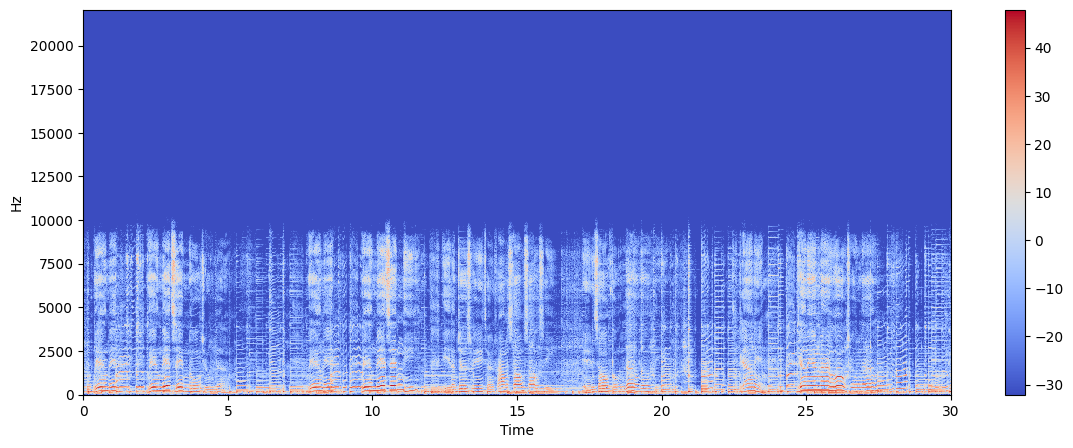

In [29]:
x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [30]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
     

In [31]:
import csv
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./Audiodata/genres/{g}'):
        songname = f'./Audiodata/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv('data.csv')
data = data.drop(['filename'],axis=1)
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.306442  0.113431        1156.202363         1497.758884  2170.511875   
1     0.280721  0.101915        1210.457126         1498.054609  2522.543080   
2     0.280554  0.124669        1649.287754         2190.221833  3761.610587   
3     0.365807  0.065685        1353.329119         1757.331005  2882.315904   
4     0.376715  0.140921        1239.687999         1659.985629  2519.043101   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.058613 -233.857513  136.172089   3.271318  48.931213  ...   
1            0.052483 -227.268860  137.730698 -14.493466  63.555702  ...   
2            0.052926 -233.750824  101.178276  17.649765  23.733782  ...   
3            0.043959 -287.923553  123.971024   5.456123  33.684544  ...   
4            0.050908 -206.281158  126.620331  10.590663  43.215721  ...   

     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16     mfcc17    mfcc18  \
0 -2.231880   3.964033  5.318362  0.812266 -1.097914  -4.539752 -2.434786   
1 -9.429529 -10.923911  3.562557  4.137706  0.095544  -2.972545 -1.378875   
2 -6.057174  -5.068858  1.067393 -5.785368 -8.311131 -11.389136 -6.727949   
3 -3.180659  -5.557003 -6.786621 -2.644233 -2.982432  -3.381138 -1.861497   
4  3.663423  -1.456047 -1.701555 -7.154654  1.186417  -6.225801  0.601273   

      mfcc19     mfcc20  label  
0   3.313449  -0.614279  blues  
1   7.541176  -3.037463  blues  
2 -10.025587 -14.032895  blues  
3   1.835920  -4.896512  blues  
4  -1.604264  -0.539220  blues  

[5 rows x 27 columns]

In [34]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)
     

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
len(y_train)

800

In [40]:
len(y_test)

200

In [41]:

X_train[10]

array([ 0.27975428, -1.26526342,  2.38183376,  2.06508728,  2.20200343,
        2.46837356, -0.13684799, -1.59526247,  1.4076178 , -1.18710834,
        1.02921406, -0.70767529,  1.08345546, -0.98667195,  0.81584757,
       -1.22591641,  1.18055232, -0.2655088 ,  0.5418439 , -0.71653084,
        0.41997338, -0.9732327 ,  0.53780204, -0.43817145, -0.17583084,
       -0.20145921])

In [68]:
from tensorflow.keras.layers import Dense, Activation
model_ann = models.Sequential()
model_ann.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(layers.Dense(128, activation='relu'))
model_ann.add(layers.Dense(64, activation='relu'))
model_ann.add(layers.Dense(10, activation='softmax'))
X_train.shape[1]
     

26

In [69]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [70]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20
)

Fit model on training data
Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 9.4144e-04 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 5.9930e-04 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 6.3069e-04 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 4.1022e-04 - accuracy: 1.0

In [71]:
test_loss, test_acc = model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 2.8049 - accuracy: 0.6250


In [72]:

print('test_acc: ',test_acc)

test_acc:  0.625


In [73]:

x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [74]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/30
2/2 [==============================] - 2s 210ms/step - loss: 2.2901 - accuracy: 0.0867 - val_loss: 2.1465 - val_accuracy: 0.3150
Epoch 2/30
2/2 [==============================] - 0s 39ms/step - loss: 2.1184 - accuracy: 0.3183 - val_loss: 2.0115 - val_accuracy: 0.3550
Epoch 3/30
2/2 [==============================] - 0s 40ms/step - loss: 1.9781 - accuracy: 0.3783 - val_loss: 1.8848 - val_accuracy: 0.3750
Epoch 4/30
2/2 [==============================] - 0s 40ms/step - loss: 1.8444 - accuracy: 0.4217 - val_loss: 1.7540 - val_accuracy: 0.4050
Epoch 5/30
2/2 [==============================] - 0s 43ms/step - loss: 1.7140 - accuracy: 0.4400 - val_loss: 1.6287 - val_accuracy: 0.4300
Epoch 6/30
2/2 [==============================] - 0s 39ms/step - loss: 1.5942 - accuracy: 0.4767 - val_loss: 1.5244 - val_accuracy: 0.4850
Epoch 7/30
2/2 [==============================] - 0s 40ms/step - loss: 1.4900 - accuracy: 0.5200 - val_loss: 1.4295 - val_accuracy: 0.5250
Epoch 8/30
2/2 [==========

In [75]:
results
     

[1.204176902770996, 0.6050000190734863]

In [76]:
predictions = model.predict(X_test)
     

7/7 [==============================] - 0s 4ms/step


In [77]:
predictions[0].shape

(10,)

In [78]:

np.sum(predictions[0])

0.99999994

In [79]:
np.argmax(predictions[0])

7

In [84]:
predict_prob=model.predict([X_test])

predict_classes=np.argmax(predict_prob,axis=1)

7/7 [==============================] - 0s 2ms/step


In [89]:

accuracy_score(y_test, predict_classes)


0.605